In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
dataset=pd.read_csv("height-weight.csv")
dataset.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

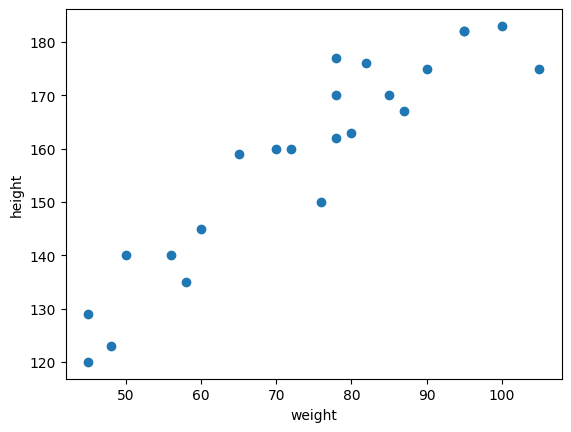

In [3]:
plt.scatter(dataset["Weight"], dataset["Height"])
plt.xlabel("weight")
plt.ylabel("height")


In [4]:
#train test split

X=dataset[["Weight"]]
y=dataset[["Height"]]

from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape , X_test.shape, y_train.shape , y_test.shape

((18, 1), (5, 1), (18, 1), (5, 1))

In [5]:
#standarization on the train dataset
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [6]:
#training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("The slope of the best fit line is " , regressor.coef_)
print("The intercept of the best fit line is " , regressor.intercept_)


The slope of the best fit line is  [[17.03440872]]
The intercept of the best fit line is  [157.5]


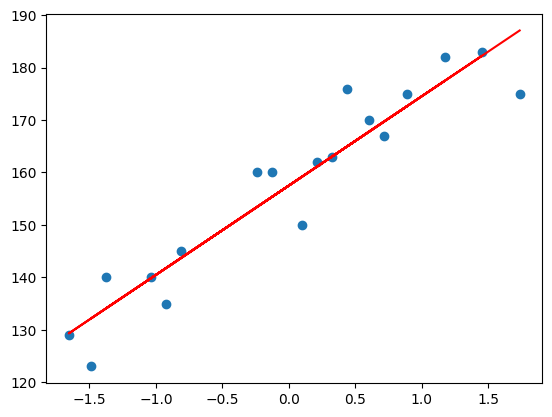

In [7]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), "r")

In [8]:
#checking accuracy with our test set 
y_test_pred = regressor.predict(X_test)
y_test_pred, y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

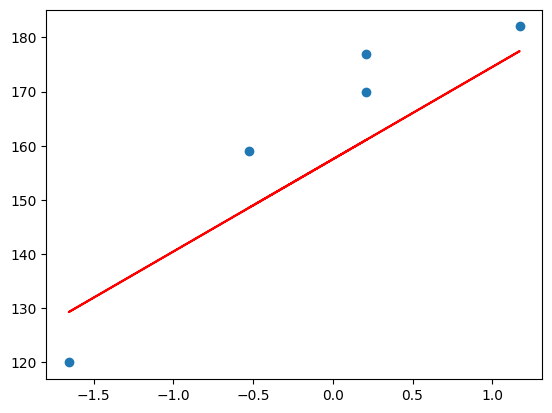

In [9]:
#visible difference like 161-177 161-170 etc etc
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

In [10]:
#calculating performance metrics 

from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error
mse=mean_squared_error(y_test, y_test_pred)
mae=mean_absolute_error(y_test, y_test_pred)
rmse=root_mean_squared_error(y_test, y_test_pred)
mse,mae,rmse

##lesser these values better your model is 

(109.77592599051664, 9.822657814519232, 10.477400726827081)

In [11]:
#accuracy calculation 
from sklearn.metrics import r2_score
score=r2_score(y_test, y_test_pred)
score

0.776986986042344

In [12]:
scaled_weight =scaler.transform([[80]])
regressor.predict(scaled_weight)
#predicted height is 163

c:\Users\LIZA CASTELINA\anaconda3\envs\kenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[163.01076266]])

[]

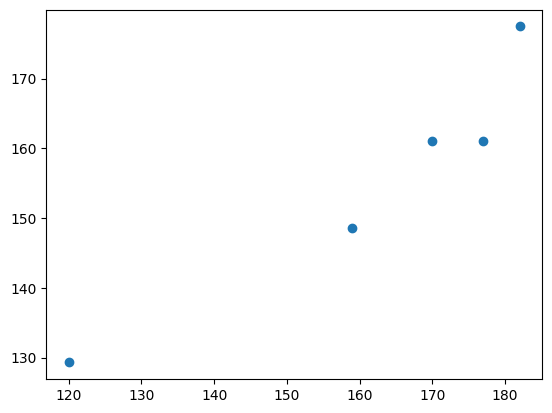

In [13]:
#Some predictions wrt regression model 

# 1. make a scatter plot of your y_test and y_pred_test and if its linear than preidtcion is right 

plt.scatter(y_test, y_test_pred)
plt.plot()

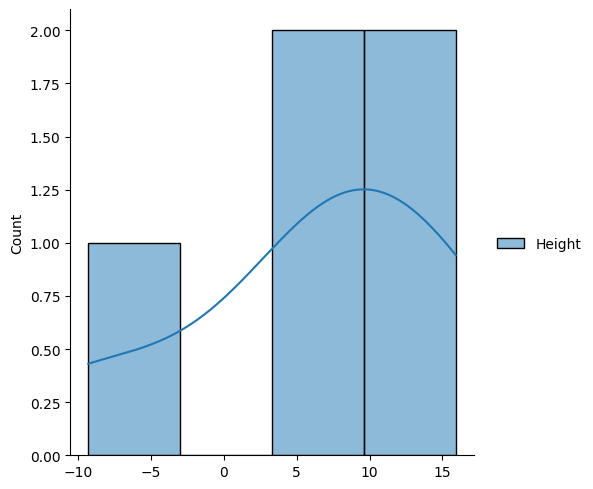

In [14]:
# 2. Residuals = actual values - predicted values, good models will have this around 0 

residuals = y_test-y_test_pred
import seaborn as sns 
sns.displot(residuals, kde=True)

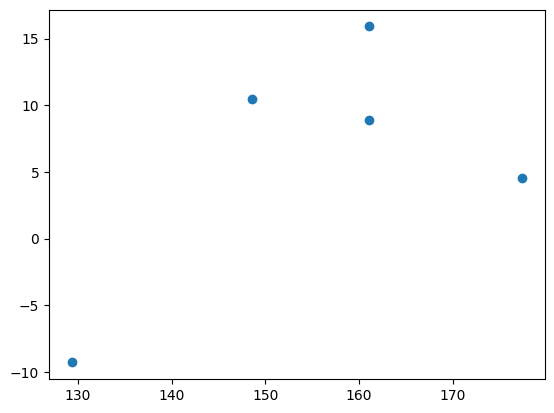

In [15]:
# 3. Scatter plot wrt prediction ad residuals should be a uniform distribuation 
plt.scatter (y_test_pred, residuals)